In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

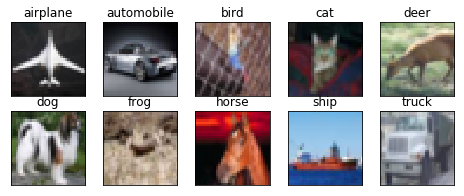

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0618 00:17:01.680906 140507786389376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 12s 31ms/step - loss: 1.8391 - acc: 0.2983 - val_loss: 1.4259 - val_acc: 0.4707
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3187 - acc: 0.5210 - val_loss: 1.0727 - val_acc: 0.6106
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1003 - acc: 0.6126 - val_loss: 0.9467 - val_acc: 0.6632
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9666 - acc: 0.6631 - val_loss: 0.8635 - val_acc: 0.6993
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8664 - acc: 0.7010 - val_loss: 0.7597 - val_acc: 0.7441
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8017 - acc: 0.7264 - val_loss: 0.7279 - val_acc: 0.7524
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7411 - acc: 0.7452 - val_loss: 0.6813 - val_acc: 0.7683
Epoch 8/100
390/390 [==============================] - 9s 22m

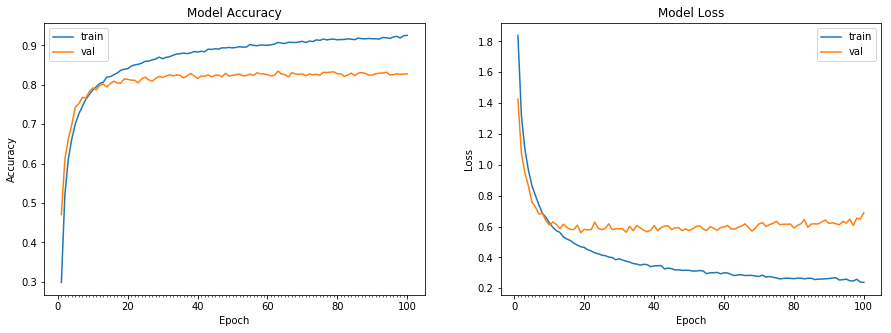

Accuracy on test data is: 82.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Functional Network

In [0]:
from keras.layers import Input, Conv2D, SeparableConv2D, Concatenate, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import plot_model

from IPython.display import Image

def add_normalisation_activation_regulariser(layer):
  layer = BatchNormalization()(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.25)(layer)
  return layer
  

inputs = Input(shape=(32, 32, 3))

# Convolution Block 1

block1_sep_conv1 = SeparableConv2D(filters=32,  depth_multiplier=1, kernel_size=(5, 5), padding='same', name='block1_sep_conv1')(inputs) #
block1_sep_conv1 = add_normalisation_activation_regulariser(block1_sep_conv1)

block1_conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', name='block1_conv1')(block1_sep_conv1)
block1_conv1 = add_normalisation_activation_regulariser(block1_conv1)

block1_conv2 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', name='block1_conv2')(block1_conv1)
block1_conv2 = add_normalisation_activation_regulariser(block1_conv2)

block1_group_conv1 = Concatenate(name='block1_group_conv1')([block1_sep_conv1, block1_conv2])

block1_sep_conv2 = SeparableConv2D(filters=32, kernel_size=(5, 5),  depth_multiplier=2, padding='same',activation='relu', name='block1_sep_conv2')(block1_group_conv1)
block1_sep_conv2 = add_normalisation_activation_regulariser(block1_sep_conv2)

# Transition Block 1

block1_group_conv2 = Concatenate(name='block1_group_conv2')([block1_sep_conv1, block1_sep_conv2])
block1_maxpool1 =  MaxPooling2D(pool_size=(2, 2), name='block1_maxpool1')(block1_group_conv2)
block1_upsampling1 = UpSampling2D(size=(2, 2))(block1_maxpool1)

# Convoltion Block 2

block2_sep_conv1 = SeparableConv2D(filters=32,  depth_multiplier=2, kernel_size=(3, 3), padding='same', activation='relu', name='block2_sep_conv1')(block1_upsampling1)
block2_sep_conv1 = add_normalisation_activation_regulariser(block2_sep_conv1)


block2_group_conv1 = Concatenate(name='block2_group_conv1')([block1_sep_conv1, block1_sep_conv2, block2_sep_conv1])

block2_conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name='block2_conv1')(block2_group_conv1)
block2_conv1 = add_normalisation_activation_regulariser(block2_conv1)


block2_group_conv2 = Concatenate(name='block2_group_conv2')([block1_sep_conv2, block1_conv2, block2_sep_conv1, block2_conv1])

block2_sep_conv2 = SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='block2_conv2')(block2_group_conv2)
block2_sep_conv2 = add_normalisation_activation_regulariser(block2_sep_conv2)


block2_group_conv3 = Concatenate(name='block2_group_conv3')([block2_sep_conv2, block1_sep_conv1, block1_sep_conv2, block1_conv2, block2_conv1])

block2_sep_conv3 = SeparableConv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name='block2_sep_conv2')(block2_group_conv3)
block2_sep_conv3 = add_normalisation_activation_regulariser(block2_sep_conv3)


# Transition Block 1

block2_group_conv4 = Concatenate(name='block2_group_conv4')([block2_sep_conv2, block1_sep_conv1, block1_sep_conv2, block2_sep_conv3])

block2_maxpool1 =  MaxPooling2D(pool_size=(2, 2), name='block2_maxpool1')(block2_group_conv4)
block2_upsampling1 = UpSampling2D(size=(2, 2))(block2_maxpool1)

# Convolution Block 3

block3_group_conv1 = Concatenate(name='block3_group_conv1')([block2_conv1, block2_upsampling1])

block3_conv1 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', name='block3_conv1')(block3_group_conv1)
block3_conv1 = add_normalisation_activation_regulariser(block3_conv1)


block3_group_conv2 = Concatenate(name='block3_group_conv2')([block1_sep_conv1, block1_conv1, block1_conv1, block2_sep_conv2, block3_conv1])

block3_sep_conv1 = SeparableConv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name='block3_sep_conv1')(block3_group_conv2)
block3_sep_conv1 = add_normalisation_activation_regulariser(block3_sep_conv1)


block3_group_conv3 = Concatenate(name='block3_group_conv3')([block3_sep_conv1, block2_sep_conv1, block1_conv1, block1_conv2, block3_conv1])


block3_conv2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', name='block3_conv2')(block3_group_conv3)
block3_conv2 = add_normalisation_activation_regulariser(block3_conv2)


block3_group_conv4 = Concatenate(name='block3_group_conv4')([block1_sep_conv1, block1_sep_conv2, block2_sep_conv1, 
                                                             block3_sep_conv1, block3_conv2, block2_sep_conv2, block1_conv2])

block3_sep_conv2 = SeparableConv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name='block3_sep_conv2')(block3_group_conv4)
block3_sep_conv2 = add_normalisation_activation_regulariser(block3_sep_conv2)

block3_group_conv5 = Concatenate(name='block3_group_conv5')([block1_sep_conv2, block3_sep_conv1, block2_sep_conv2, block3_sep_conv2])

# Convolution Block 4 (Not in the ENAS)

block4_conv1 = Conv2D(filters=32, kernel_size=(4, 4), activation='relu', padding='same', name='block4_conv1')(block3_group_conv5)
block4_conv1 = add_normalisation_activation_regulariser(block4_conv1)

block4_pointwise_conv1 = Conv2D(10, (1, 1), padding='same', activation='relu', name='pointwise_conv')(block4_conv1)

block4_gap1 = GlobalAveragePooling2D()(block4_pointwise_conv1)
output=Activation('softmax')(block4_gap1)

model = Model(inputs=inputs, outputs=output)

learning_rate = 0.003

def scheduler(epoch, lr):
  return round(learning_rate * 1/(1 + 0.35 * epoch), 10)

mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_60 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_sep_conv1 (SeparableConv (None, 32, 32, 32)   203         input_60[0][0]                   
__________________________________________________________________________________________________
batch_normalization_213 (BatchN (None, 32, 32, 32)   128         block1_sep_conv1[0][0]           
__________________________________________________________________________________________________
activation_261 (Activation)     (None, 32, 32, 32)   0           batch_normalization_213[0][0]    
__________________________________________________________________________________________________
dropout_21

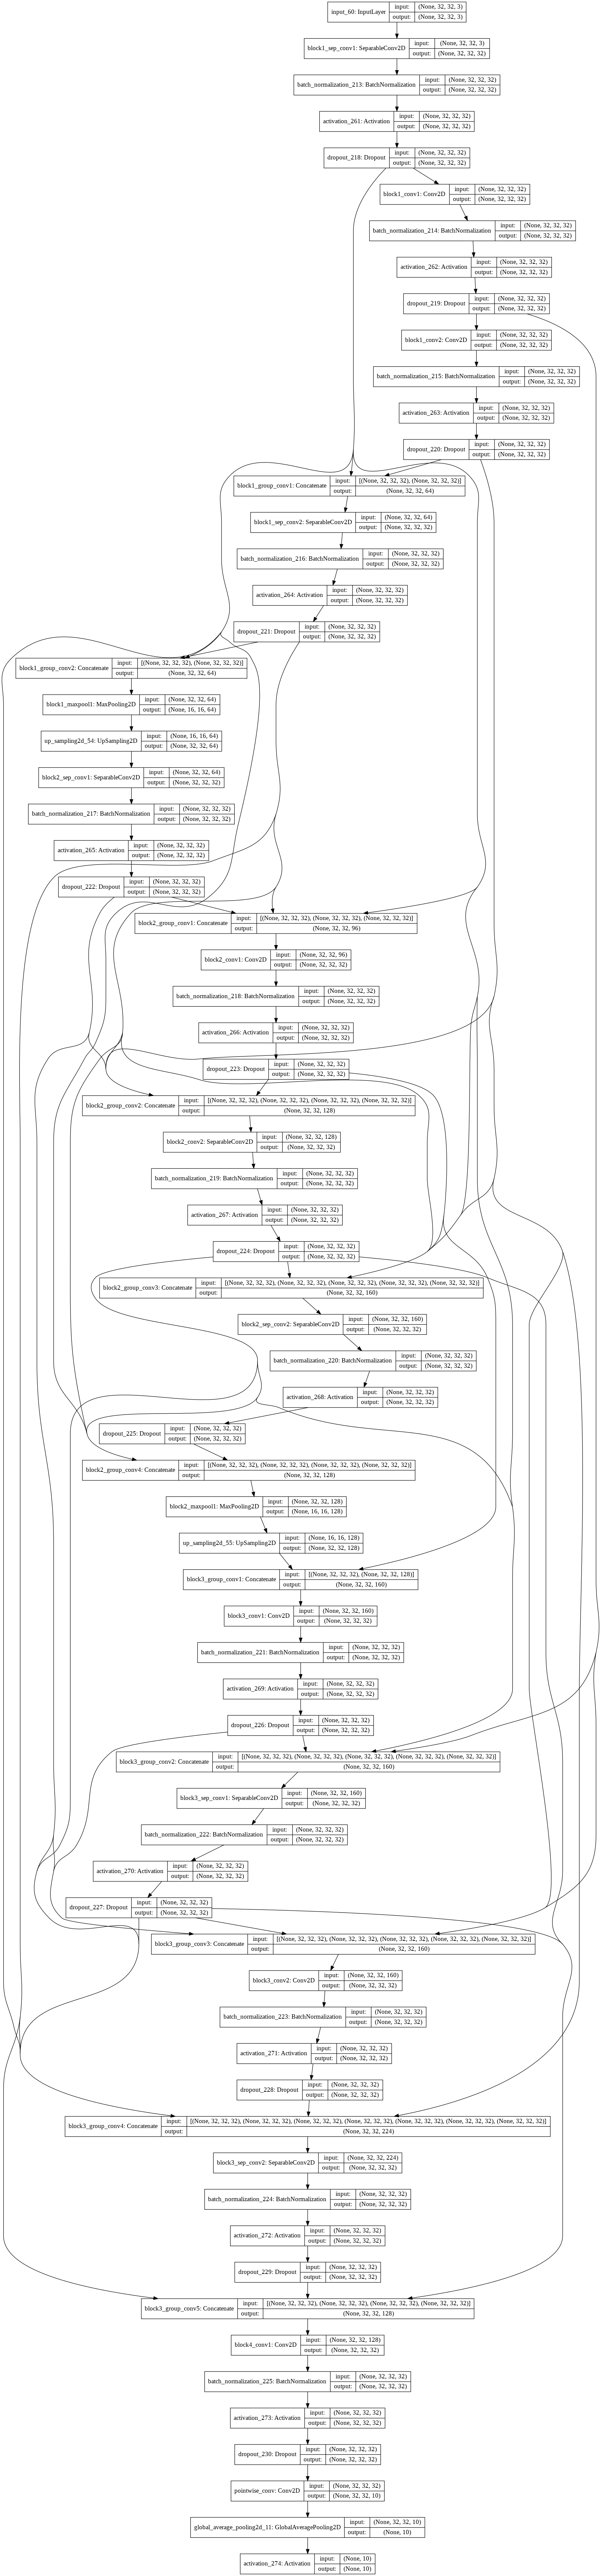

In [111]:
model.summary()

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 124s 319ms/step - loss: 1.5448 - acc: 0.4390 - val_loss: 1.6299 - val_acc: 0.4269

Epoch 00001: val_acc improved from -inf to 0.42690, saving model to best_model.h5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022222222.
390/390 [==============================] - 109s 281ms/step - loss: 1.0816 - acc: 0.6165 - val_loss: 1.1758 - val_acc: 0.5845

Epoch 00002: val_acc improved from 0.42690 to 0.58450, saving model to best_model.h5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0017647059.
390/390 [==============================] - 109s 280ms/step - loss: 0.9146 - acc: 0.6797 - val_loss: 2.0965 - val_acc: 0.4261

Epoch 00003: val_acc did not improve from 0.58450
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0014634146.
390/390 [==============================] - 109s 280ms/step - los

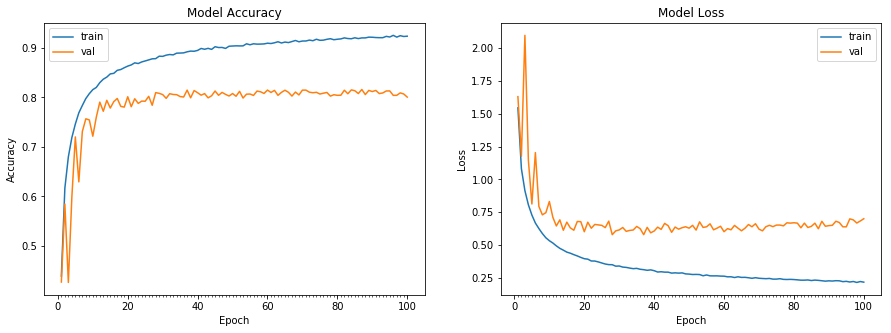

Accuracy on test data is: 80.04


In [112]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1), mc], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))